In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Loading Data

In [3]:
data= pd.read_csv(r"C:\Users\PC\OneDrive\Dokumente\tutorial pythonfiles\csv files\housing.csv")
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Missing Data Analysis

In [7]:
#check missing values
missing_values = data.isnull().sum()

missing_percentage = (missing_values/len(data))*100
#display the missing data
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [8]:
data1 = data.dropna()
data1.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Data Exploration and Visualization

In [9]:
data1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


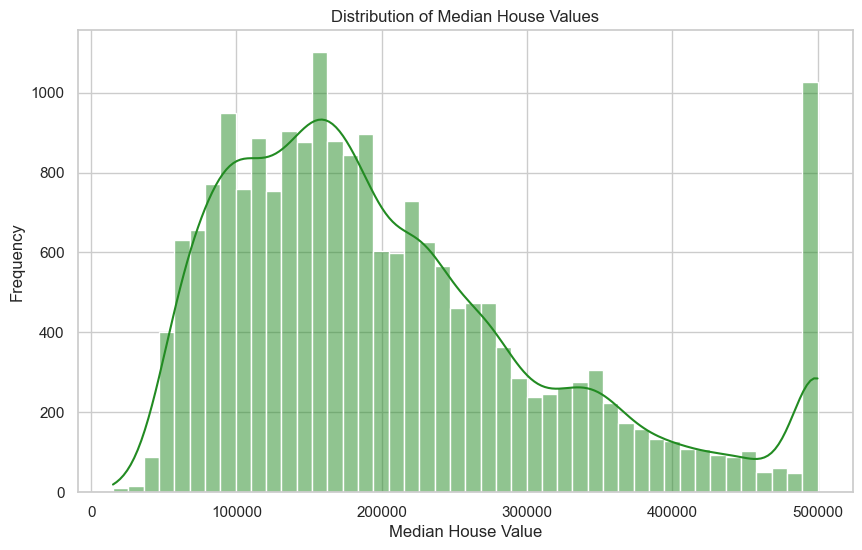

In [10]:
sns.set(style= "whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data1["median_house_value"], color="forestgreen", kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()
    

Using inter-quantile range to remove Outliers

In [11]:
Q1 = data1['median_house_value'].quantile(0.25)
print("Q1\n",Q1)
Q3 = data1['median_house_value'].quantile(0.75)
print("Q3\n",Q3)
IQR = Q3 - Q1
#define the bounds for the outliers
lower_bound = Q1 - 1.5*IQR
print("Lower Bound\n",lower_bound)
upper_bound = Q3 + 1.5*IQR
print("Upper Bound\n",upper_bound)

#Remove Outliers
data2 = data1[(data1['median_house_value']>=lower_bound) & (data1['median_house_value']<=upper_bound)]
print("Data Shape\n",data2.shape)

Q1
 119500.0
Q3
 264700.0
Lower Bound
 -98300.0
Upper Bound
 482500.0
Data Shape
 (19369, 10)


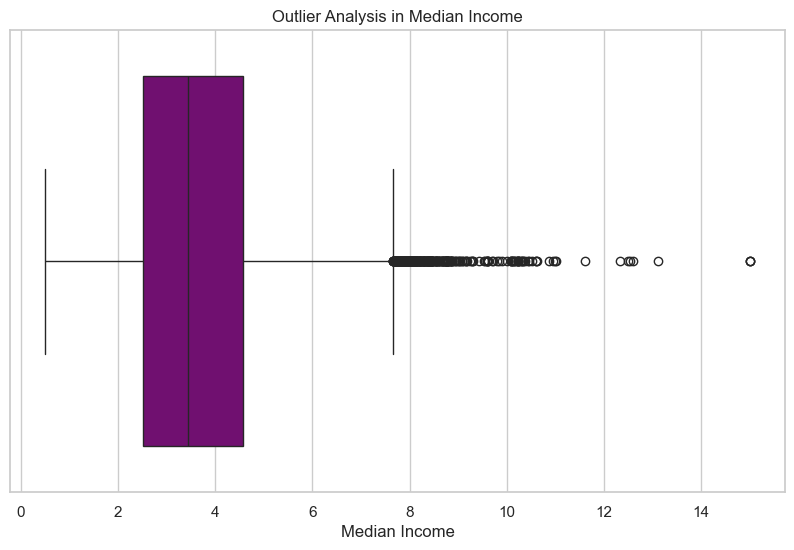

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x= data2['median_income'], color = 'purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [13]:
Q1 = data2['median_income'].quantile(0.25)
print("Q1\n",Q1)
Q3 = data2['median_income'].quantile(0.75)
print("Q3\n",Q3)
IQR = Q3 - Q1
#define the bounds for the outliers
lower_bound = Q1 - 1.5*IQR
print("Lower Bound\n",lower_bound)
upper_bound = Q3 + 1.5*IQR
print("Upper Bound\n",upper_bound)

#Remove Outliers
data3 = data2[(data2['median_income']>=lower_bound) & (data2['median_income']<=upper_bound)]
print("Data Shape\n",data3.shape)

Q1
 2.5223
Q3
 4.5724
Lower Bound
 -0.5528499999999998
Upper Bound
 7.64755
Data Shape
 (19026, 10)


Correlation HeatMap Analysis

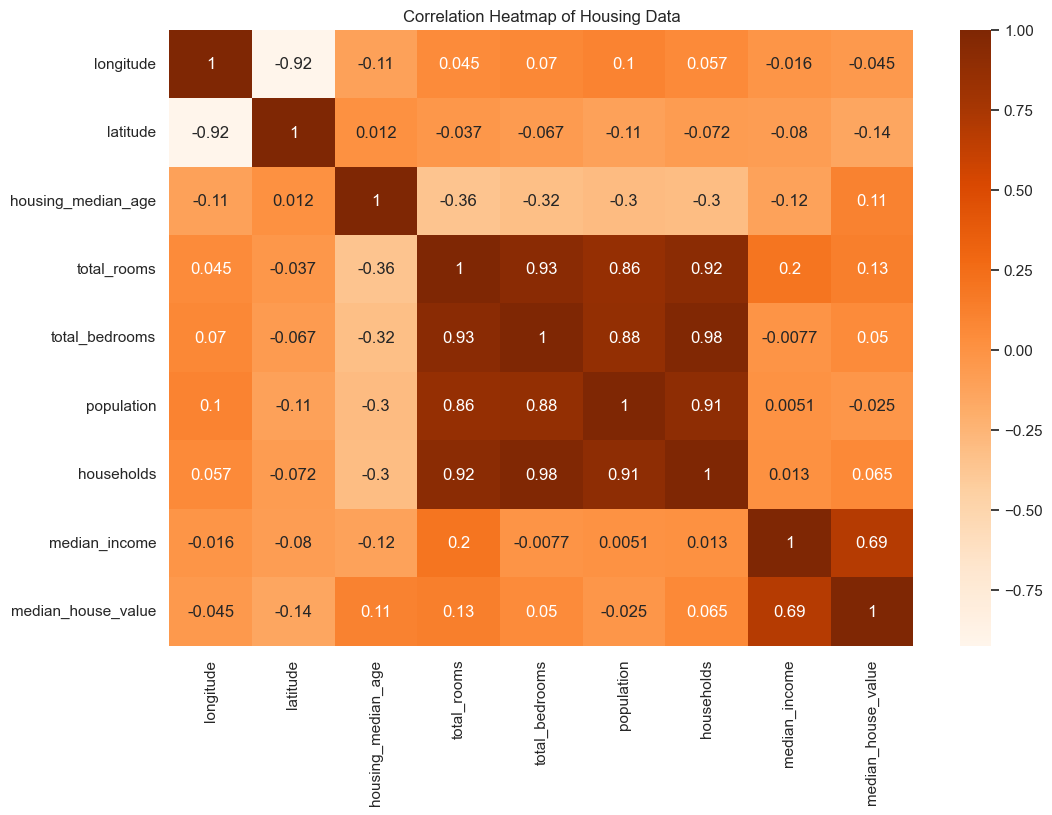

In [14]:
data0= data1.select_dtypes(include= 'number')
plt.figure(figsize=(12,8))
sns.heatmap(data0.corr(), annot=True, cmap='Oranges')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

 Majority in the heatmap is light orange= Section where indepedent variables have low +ve correlation with remaining independent variables
 Center of the heatmap Dark orange  = the section means the independent variables are highly correlated to other independent variables, this may cause the linear regression model to result to very large standard errors and not accurate.Hence wise to drop the total_bedrooms after further heatmap analysis its correlated with the dependent variable (median_house_value) at 0.05 and is highly correlated to total_rooms&households(independent variables) with 0.93 and 0.98. this is to avoid the perfect multicollinearity in the linear regression model.
 

In [15]:
data3= data3.drop("total_bedrooms", axis = 1)
data3.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [16]:
#unique count for Categorical data
for column in ['ocean_proximity']:
    print(f"Unique values in {column}:", data3[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


String Data Categorization to Dummy Variables

In [17]:
ocean_proximity_dummies = pd.get_dummies(data3['ocean_proximity'], prefix = "ocean_proximity").astype(int)
data4= pd.concat([data3.drop('ocean_proximity', axis = 1), ocean_proximity_dummies], axis=1)
#ocean_proximity_dummies=ocean_proximity_dummies.astype(int)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [18]:
data4.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

to prevent perfect multiple collinearity

In [19]:
data5 = data4.drop("ocean_proximity_ISLAND", axis = 1)
data5.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [20]:
data5.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


In [21]:
#Defined features (indepedent variables) and target (depedent variables)
features =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income','ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target =['median_house_value']
x= data5[features]
y= data5[target]
#splitted the data into training set and a testing set
#test_size specifies the proportion of the data to be included in the test split
#random_state ensures reproducibility of your split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1111)

#check the size of splits
print(f'Training set size:{x_train.shape[0]} samples')
print(f'Test set size:{x_test.shape[0]} samples')
 

Training set size:15220 samples
Test set size:3806 samples


Causal Analysis

In [22]:
#Adding a constant to the predictors because statsmodel' OLS doesn't include it by default
x_train_const = sm.add_constant(x_train)
x_train_const.head()

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0


In [23]:
#Fit the OLS model
model_fitted = sm.OLS(y_train,x_train_const).fit()
#Print summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:47:10   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Interpreting the Causal analysis. all the independent Variables are statistically significant.Through P-values is very small(P-values says what's the probability that i've obtained too high of a test statistics, given that this is just by random chance not because the hypothesis is false hence not rejecting it)
Least Squares = minimizing sum of squared residuals
R_squared = Matrix showcases what is the goodness of fit hence all the data and all the indepedent variables are able to explain 59% of variation in the response variable (the house value).giving enough information
NB: if you want to increase the r_squared value its advisable to look for more information to add to the data eg. add more independent variables to the existing variables.
F-test = shows joint statistical significance. above show the P-value being very small and F-test being large means the independent variables all together are statistically significant impact on the dependent variable
-ve Coefficient in the independent variables shows a negative change on the dependent variable.Standard Error are Large -> sign that the model A4, A5 are most likely violated hence the issue of heteroscedasticity is present  and the homoscedasticity is violated this will be a problem on the performance of the model.
More information on the attached readme file.


PREDICTION/TESTING

In [24]:
#adding a constant to the test predictors
x_test_const = sm.add_constant(x_test)

#Making Predictions on the test set
test_predictions = model_fitted.predict(x_test_const)
test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

CHECKING OLS ASSUMPTIONS

1. LINEARITY

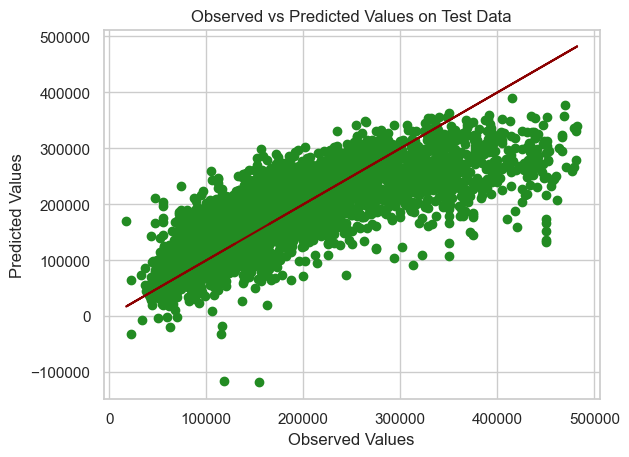

In [25]:
#scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color ="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test, y_test, color ='darkred') #line for perfect prediction (true values)
plt.show()

Positive Linear Relationship: the red line( which represents a perfect prediction line) and the distribution of the data points suggest there's a +ve linear relationship between observed and predicted values. increase in observed values leads to increase in predicted values hence a good sign of linearity.
The overall plot provides a visual comparison between the observed (true) values and the predicted values from the model. The scatter plot shows individual predictions, while the diagonal line represents perfect predictions. By comparing the scatter points to the diagonal line, you can assess the accuracy of the model:

Points close to the diagonal line indicate accurate predictions.
Points far from the diagonal line indicate larger prediction errors.
This plot is useful for evaluating the performance of regression model and identifying potential areas where the model might be underperforming.

2. RANDOM SAMPLE

In [27]:
#Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)
print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is -0.0


while we cannot directly observe the true errors in the model, we canwork with residuals, which are the differences between the observed valuese and the predicted values from the model. if the model is well_fitted the residuals should randomlyscatterd around zero without any systematic patterns.

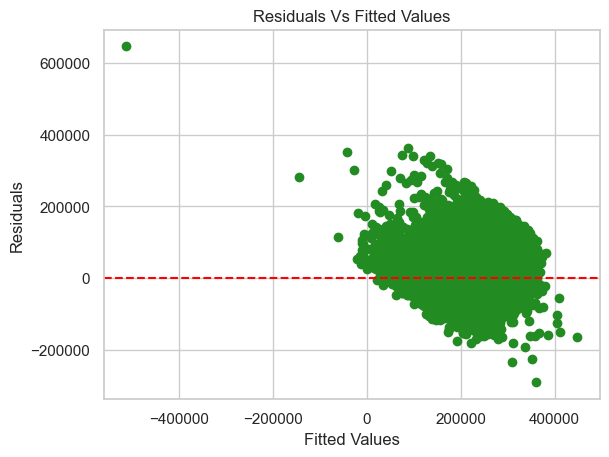

In [28]:
#Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle ='--')
plt.xlabel ('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Vs Fitted Values')
plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend.if the residuals shows a systematic deviation from it could suggest issues such as model misspecification, non linearity or ommitted variable bias.

3.Exogeneity

In [30]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in x_train.columns:
    corr_coefficient = np.corrcoef(x_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: 0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.0


Durbin-Wu-Hausman Test: For a more formal statistical test, use the Durbin-Wu-Hausman test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the coefficients of the model change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires identification of suitable instruments, which is not always straightforward.

Homoskedasticty

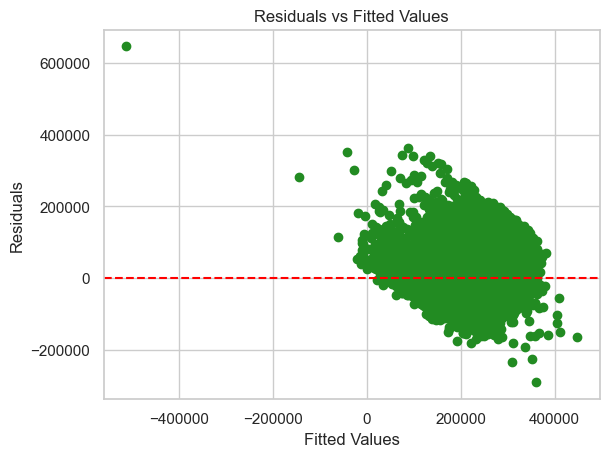

In [31]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Random Scatter: If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.

Pattern or Shape: If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.

Train/Test/Evaluation with Sklearn

Scaling the Data

In [32]:
from sklearn.preprocessing import StandardScaler
# Initialized the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Applied the same transformation to the test data
x_test_scaled = scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Created and fit the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# Made predictions on the scaled test data
y_pred = lr.predict(x_test_scaled)

# Calculated MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 59405.88869441674


In [34]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
